In [54]:
import pandas as pd
import numpy as np 
from rdkit.Chem import SaltRemover
from molvs import Standardizer
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
import seaborn as sns
import matplotlib.pyplot as plt

### Sanitizing molecules 

We will make use of rdkit and molvs to remove salt from molecules and sanitize it.

In [2]:
df = pd.read_csv("dataset_clean.csv",sep="\t")

In [3]:
df.head()

,Molecule ChEMBL ID,Smiles,Standard Value,label,pIC50
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,5600.0,1,5.251812
1,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,9.0,1,8.045757
2,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,3600.0,1,5.443697
3,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,72.0,1,7.142668
4,CHEMBL148406,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,191.0,1,6.718967


In [24]:
remover = SaltRemover.SaltRemover()
s = Standardizer()
SMILES= []

for mol in df.Smiles:
    if mol is not None:
        mol = Chem.MolFromSmiles(mol)
        mol = s.standardize(mol)
        mol = remover(mol)
        mol = Chem.MolToSmiles(mol)
        SMILES.append(mol)

In [26]:
df["SMILES"] = SMILES

In [27]:
df

,Molecule ChEMBL ID,Smiles,Standard Value,label,pIC50,SMILES
0,CHEMBL237149,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,5600.0,1,5.251812,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1
1,CHEMBL4066965,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,9.0,1,8.045757,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...
2,CHEMBL1644424,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,3600.0,1,5.443697,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...
3,CHEMBL146718,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,72.0,1,7.142668,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...
4,CHEMBL148406,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,191.0,1,6.718967,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1
...,...,...,...,...,...,...
469,CHEMBL4741966,COc1ccc(CC[C@@H](NC(=O)[C@H](COCc2ccccc2)NC(C)...,16.3,1,7.787812,COc1ccc(CC[C@@H](NC(=O)[C@H](COCc2ccccc2)NC(C)...
470,CHEMBL4758924,CC(=O)N[C@@H](COCc1ccccc1)C(=O)N[C@H](CCc1cccc...,20.9,1,7.679854,CC(=O)N[C@@H](COCc1ccccc1)C(=O)N[C@H](CCc1cccc...
471,CHEMBL4755394,COc1ccc(CC[C@@H](NC(=O)[C@H](CCCc2ccccc2)NC(=O...,4.5,1,8.346787,COc1ccc(CC[C@@H](NC(=O)[C@H](CCCc2ccccc2)NC(=O...
472,CHEMBL4759199,CC(=O)N[C@@H](COCc1ccccc1)C(=O)N[C@H](CCc1cccc...,57.1,1,7.243364,CC(=O)N[C@@H](COCc1ccccc1)C(=O)N[C@H](CCc1cccc...


In [28]:
df.drop("Smiles",axis=1,inplace=True)

In [31]:
df.to_csv("dataset_sanitized.csv",index=False)

In [29]:
df.head()

,Molecule ChEMBL ID,Standard Value,label,pIC50,SMILES
0,CHEMBL237149,5600.0,1,5.251812,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1
1,CHEMBL4066965,9.0,1,8.045757,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...
2,CHEMBL1644424,3600.0,1,5.443697,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...
3,CHEMBL146718,72.0,1,7.142668,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...
4,CHEMBL148406,191.0,1,6.718967,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1


### Drug Likeness

To better understand the chemical space of the dataset molecules, we will generate descriptors according to Lipinski Ro5 and compare between actives and inactives.

In [32]:
PandasTools.AddMoleculeColumnToFrame(df,"SMILES","mol")

,Molecule ChEMBL ID,Standard Value,label,pIC50,SMILES,mol
0,CHEMBL237149,5600.0,1,5.251812,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,
1,CHEMBL4066965,9.0,1,8.045757,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,
2,CHEMBL1644424,3600.0,1,5.443697,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,
3,CHEMBL146718,72.0,1,7.142668,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,
4,CHEMBL148406,191.0,1,6.718967,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,

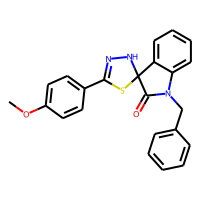
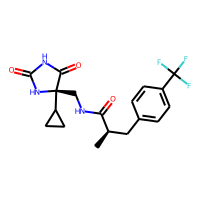
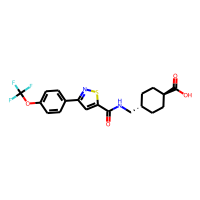
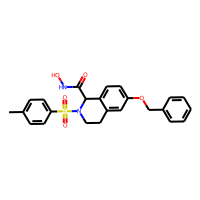
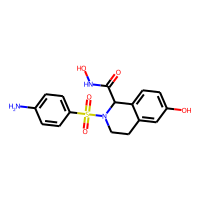

In [33]:
df.head()

In [35]:
df["Molwt"] = df["mol"].apply(Descriptors.MolWt)
df["LogP"] = df["mol"].apply(Descriptors.MolLogP)
df["HBA"] = df["mol"].apply(Descriptors.NumHAcceptors)
df["HBD"] = df["mol"].apply(Descriptors.NumHDonors)


In [38]:
df.drop("mol",axis=1,inplace=True)

In [39]:
df.head()

,Molecule ChEMBL ID,Standard Value,label,pIC50,SMILES,Molwt,LogP,HBA,HBD
0,CHEMBL237149,5600.0,1,5.251812,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,401.491,4.09300,5,1
1,CHEMBL4066965,9.0,1,8.045757,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,383.370,1.98840,3,3
2,CHEMBL1644424,3600.0,1,5.443697,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,428.432,4.32950,5,2
3,CHEMBL146718,72.0,1,7.142668,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,452.532,3.36752,5,2
4,CHEMBL148406,191.0,1,6.718967,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,363.395,0.76790,6,4


<AxesSubplot:xlabel='pIC50', ylabel='Count'>

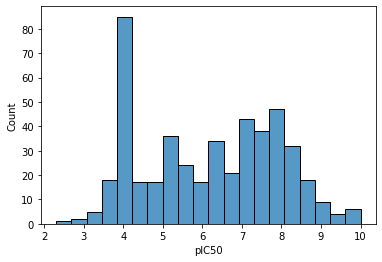

In [48]:
sns.histplot(df["pIC50"],bins=20)

<AxesSubplot:xlabel='Molwt', ylabel='Count'>

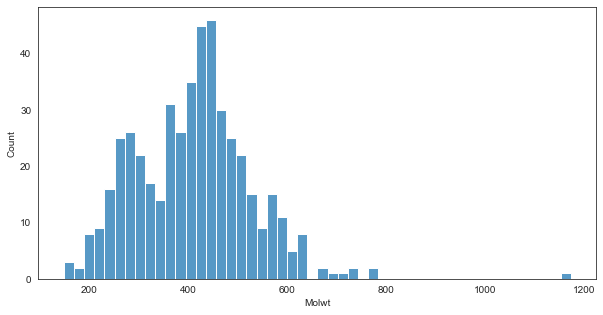

In [56]:
plt.figure(figsize=(10,5))
sns.set_style("white")
sns.histplot(df["Molwt"],bins=50)

+ Most of Molecules Lies below 600.

<AxesSubplot:xlabel='label', ylabel='Molwt'>

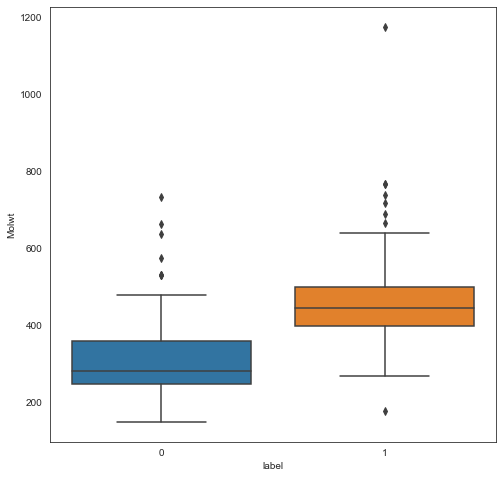

In [62]:
plt.figure(figsize=(8,8))
sns.set_style("white")
sns.boxplot(x=df["label"],y=df["Molwt"])

+ Active inhibitors tend to have larger Molwt than inactives.

<AxesSubplot:xlabel='LogP', ylabel='Count'>

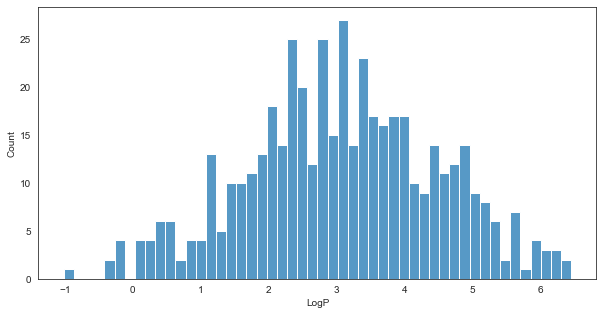

In [63]:
plt.figure(figsize=(10,5))
sns.set_style("white")
sns.histplot(df["LogP"],bins=50)

<AxesSubplot:xlabel='label', ylabel='LogP'>

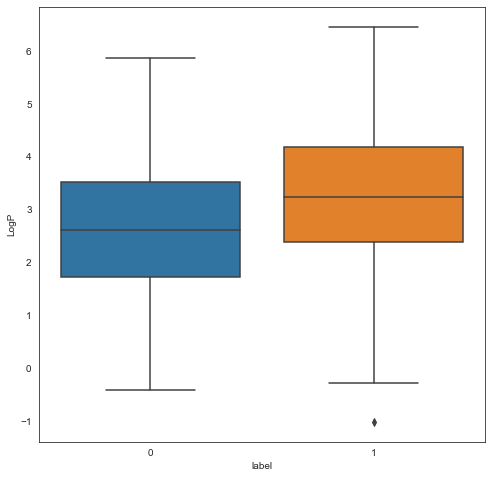

In [64]:
plt.figure(figsize=(8,8))
sns.set_style("white")
sns.boxplot(x=df["label"],y=df["LogP"])

+ It seems that both actives and inactives share similar logP properties. 

<AxesSubplot:xlabel='label', ylabel='HBA'>

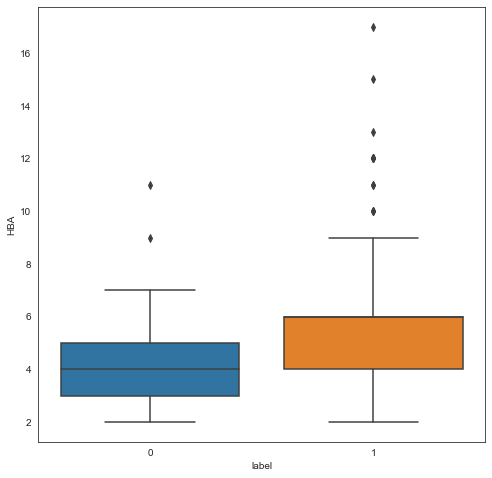

In [66]:
plt.figure(figsize=(8,8))
sns.set_style("white")
sns.boxplot(x=df["label"],y=df["HBA"])

<AxesSubplot:xlabel='label', ylabel='HBD'>

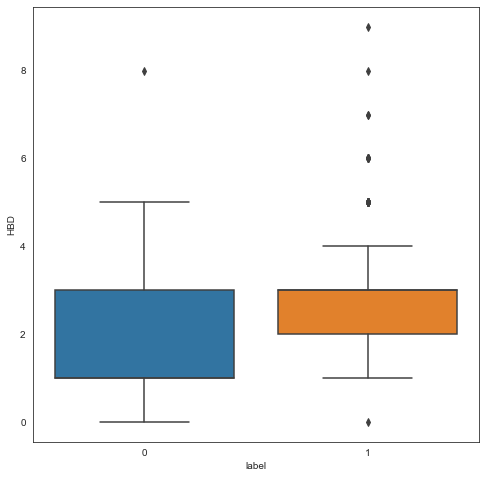

In [67]:
plt.figure(figsize=(8,8))
sns.set_style("white")
sns.boxplot(x=df["label"],y=df["HBD"])

[]

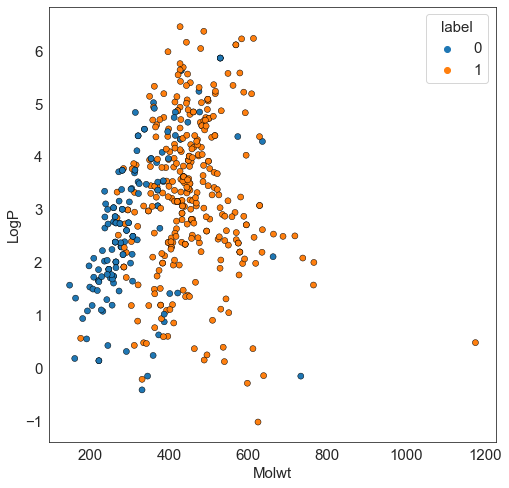

In [101]:
plt.figure(figsize=(8,8))

plt.rc("font",size=15)
sns.scatterplot(x=df["Molwt"],y=df["LogP"],hue=df["label"],edgecolor="black")
plt.plot()

As observed before, both actives and inactives tend to have similar LogP but different Molwt.

In [96]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, "label"]
  df_ = df[selection]
  agonist = df_[df_["label"] == 1]
  agonist = agonist[descriptor]

  selection = [descriptor, "label"]
  df_ = df[selection]
  antagonist = df_[df_["label"] == 0]
  antagonist = antagonist[descriptor]

# compare samples
  stat, p = mannwhitneyu(agonist, antagonist)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  return results

In [97]:
mannwhitney("Molwt")

,Descriptor,Statistics,p,alpha,Interpretation
0,Molwt,5766.5,7.341748e-40,0.05,Different distribution (reject H0)


In [98]:
mannwhitney("LogP")

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,17918.0,0.000008,0.05,Different distribution (reject H0)


In [99]:
mannwhitney("HBA")

,Descriptor,Statistics,p,alpha,Interpretation
0,HBA,10669.5,7.196561e-23,0.05,Different distribution (reject H0)


In [100]:
mannwhitney("HBD")

,Descriptor,Statistics,p,alpha,Interpretation
0,HBD,11494.0,6.475617e-21,0.05,Different distribution (reject H0)


### Ro5 compliance

In [118]:
ro5 =[]
for smile in df["SMILES"]:
    mol = Chem.MolFromSmiles(smile)
    molwt = Descriptors.MolWt(mol)
    logp = Descriptors.MolLogP(mol)
    hba = Descriptors.NumHAcceptors(mol)
    hbd = Descriptors.NumHDonors(mol)
    conditions = [molwt <= 500, hba <= 10, hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    ro5.append(ro5_fulfilled)

In [108]:
df["ro5"] = ro5

In [109]:
df.head()

,Molecule ChEMBL ID,Standard Value,label,pIC50,SMILES,Molwt,LogP,HBA,HBD,ro5
0,CHEMBL237149,5600.0,1,5.251812,COc1ccc(C2=NNC3(S2)C(=O)N(Cc2ccccc2)c2ccccc23)cc1,401.491,4.09300,5,1,True
1,CHEMBL4066965,9.0,1,8.045757,C[C@H](Cc1ccc(C(F)(F)F)cc1)C(=O)NC[C@@]1(C2CC2...,383.370,1.98840,3,3,True
2,CHEMBL1644424,3600.0,1,5.443697,O=C(NC[C@H]1CC[C@H](C(=O)O)CC1)c1cc(-c2ccc(OC(...,428.432,4.32950,5,2,True
3,CHEMBL146718,72.0,1,7.142668,Cc1ccc(S(=O)(=O)N2CCc3cc(OCc4ccccc4)ccc3C2C(=O...,452.532,3.36752,5,2,True
4,CHEMBL148406,191.0,1,6.718967,Nc1ccc(S(=O)(=O)N2CCc3cc(O)ccc3C2C(=O)NO)cc1,363.395,0.76790,6,4,True


In [110]:
df.ro5.value_counts()

True     441
False     33
Name: ro5, dtype: int64

**33 molecules violate Ro5 in more than one of the rules. Lets check them.**

In [113]:
df[df["ro5"] == False]

,Molecule ChEMBL ID,Standard Value,label,pIC50,SMILES,Molwt,LogP,HBA,HBD,ro5
54,CHEMBL77995,4.000,1,8.397940,CNC(=O)[C@@H](NC(=O)C(CCc1ccccc1)CP(=O)(O)Cc1c...,578.690,5.58230,4,3,False
57,CHEMBL4279699,65.000,1,7.187087,CO[C@@H]1O[C@H](CNC(=S)NCCN([C@@H](C(=O)O)C(C)...,611.739,0.37160,9,6,False
63,CHEMBL572244,100000.000,0,4.000000,Nc1nc2c(-c3[nH]c(Br)c(CCc4ccccc4C(F)(F)F)c3Br)...,529.158,5.86420,3,3,False
64,CHEMBL571388,100000.000,0,4.000000,Nc1nc2c(-c3[nH]c(Br)c(CCc4ccc(C(F)(F)F)cc4)c3B...,529.158,5.86420,3,3,False
69,CHEMBL2205661,48000.000,0,4.318759,CC(C)C[C@H](NC(=O)CNS(=O)(=O)c1ccc(-c2ccccc2)c...,732.813,-0.14800,9,8,False
77,CHEMBL2333287,2100.000,1,5.677781,COc1ccc(C[C@@H](OC(=O)/C=C/c2ccc(OCc3ccccc3)c(...,568.622,6.11410,7,1,False
85,CHEMBL2333288,2300.000,1,5.638272,COc1ccc(C[C@H](OC(=O)/C=C/c2ccc(OCc3ccccc3)c(O...,568.622,6.11410,7,1,False
90,CHEMBL567893,5000.000,1,5.301030,COC(=O)[C@@H]1CCCN1C(=O)[C@@H](Cc1ccccc1)N(C)C...,1174.445,0.48520,17,8,False
112,CHEMBL562114,28.000,1,7.552842,CC(C)[C@H](NS(=O)(=O)c1ccc2c(c1)sc1cc(NC(=O)Oc...,516.572,5.19200,6,3,False
115,CHEMBL77163,1.698,1,8.770062,CNC(=O)[C@@H](NC(=O)C(CCc1ccc(Cl)cc1)CP(=O)(O)...,583.109,6.22710,3,3,False


#### We will keep all molecules.  But this was a good example of how the Ro5 can be used as an alert but should not necessarily be used as a filter.

In [117]:
ro5_fulfilled = sum(conditions) >= 3